(Lập trình) Cho dữ liệu Red Wine Quality2, liên quan đến các mẫu rượu vang Vinho Verde đỏ từ phía bắc Bồ Đào Nha. Mục tiêu của bài toán là mô hình hóa chất lượng rượu dựa trên các chỉ số hóa lý đo đạc được.
Sử dụng câu lệnh sau để chia dữ liệu đầu vào thành hai phần huấn luyện 70% và
kiểm thử 30%.

Sinh viên hãy thực hiện lại từ yêu cầu 3 trở đi trong phần Yêu cầu lập trình, áp dụng với dữ liệu trên. Lưu ý, thuộc tính quyết định là ‘quality’.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Yêu cầu 3.** Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột
nào có giá trị tương đồng cao thì hãy loại bỏ.


Huỳnh Thị Trúc Lam - 6351071040
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free su

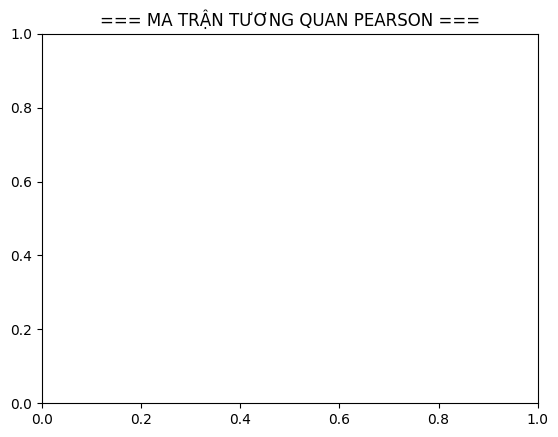

In [ ]:
correlation_matrix = df.corr(method='pearson')
print("\nHuỳnh Thị Trúc Lam - 6351071040")


plt.title('=== MA TRẬN TƯƠNG QUAN PEARSON ===')
print(correlation_matrix)

# Tìm các cặp cột có tương quan cao
threshold = 0.8
high_corr_pairs = []

for i_col_name in correlation_matrix.columns:
    for j_col_name in correlation_matrix.columns:
        if i_col_name < j_col_name and abs(correlation_matrix.loc[i_col_name, j_col_name]) > threshold:
            high_corr_pairs.append((i_col_name, j_col_name, correlation_matrix.loc[i_col_name, j_col_name]))

high_corr_pairs = list(set(high_corr_pairs))

if len(high_corr_pairs) == 0:
    print(f"\nKhông có cặp cột nào có tương quan tuyệt đối lớn hơn {threshold}")
else:
    print(f"\n=== CÁC CẶP CỘT CÓ TƯƠNG QUAN CAO (>|{threshold}|) ===")
    for c1, c2, val in high_corr_pairs:
        print(f"{c1}  <-->  {c2}   :  {val:.3f}")


Huỳnh Thị Trúc Lam - 6351071040


<Axes: >

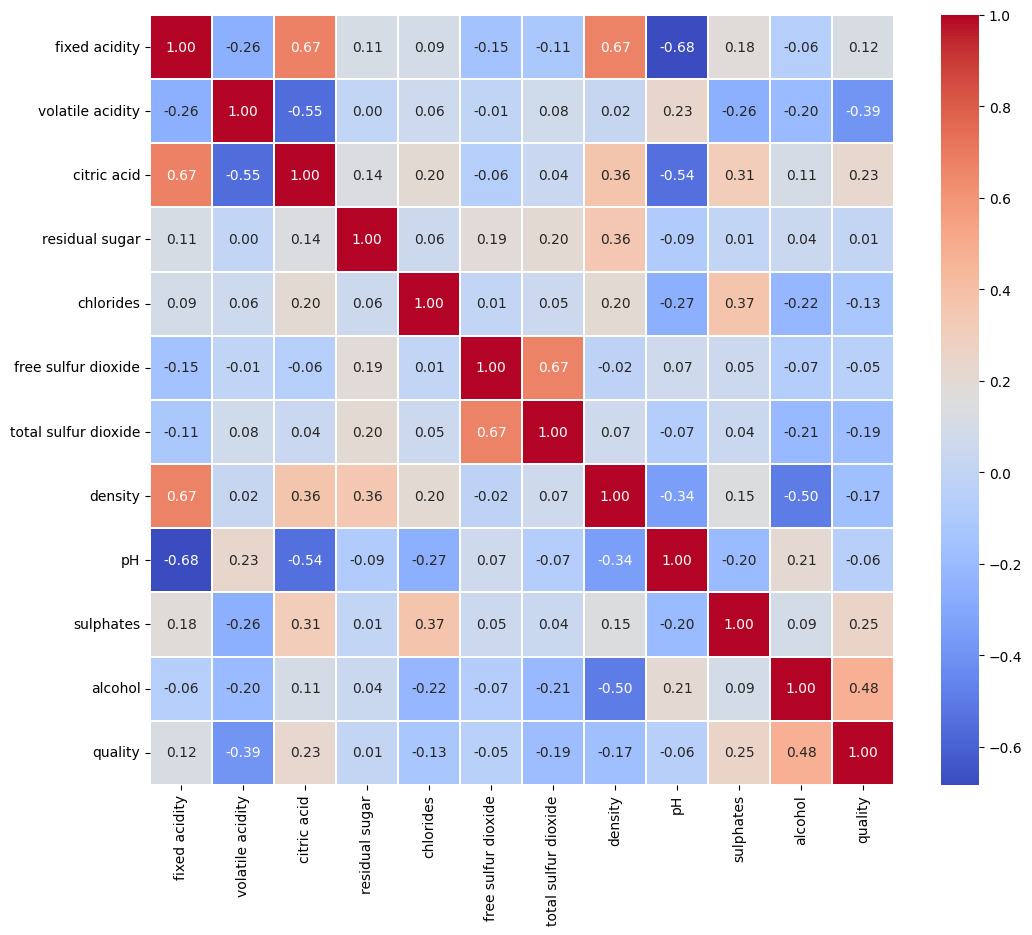

In [ ]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)

**Yêu cầu 4:** Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

In [ ]:
fearures = df_filtered.drop('quality', axis=1)
labels = df_filtered['quality']

print("\nHuỳnh Thị Trúc Lam - 6351071040")
print("Kích thước của X (đặc trưng):", X.shape)
print("Kích thước của y (mục tiêu):", y.shape)


Huỳnh Thị Trúc Lam - 6351071040
Kích thước của X (đặc trưng): (1599, 11)
Kích thước của y (mục tiêu): (1599,)


**Yêu cầu 5:** Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện.

In [ ]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")
fearures_onehot=pd.get_dummies(
    fearures,
    columns=fearures.select_dtypes(exclude=["int64", "float64"]).columns,
    drop_first=True   # tránh đa cộng tuyến
)

fearures_onehot


Huỳnh Thị Trúc Lam - 6351071040


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


**Yêu cầu 6:** Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Kích thước của X_train:", X_train.shape)
print("Kích thước của X_test:", X_test.shape)
print("Kích thước của y_train:", y_train.shape)
print("Kích thước của y_test:", y_test.shape)

Kích thước của X_train: (1119, 11)
Kích thước của X_test: (480, 11)
Kích thước của y_train: (1119,)
Kích thước của y_test: (480,)


**Yêu cầu 7:** Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

Ma trận nhầm lẫn:
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  1   8 126  58   2   0]
 [  0   5  48 121  26   0]
 [  0   1   6  26  26   2]
 [  0   0   0   3   2   1]]

Báo cáo phân loại:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.59       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480


Huỳnh Thị Trúc Lam - 6351071040


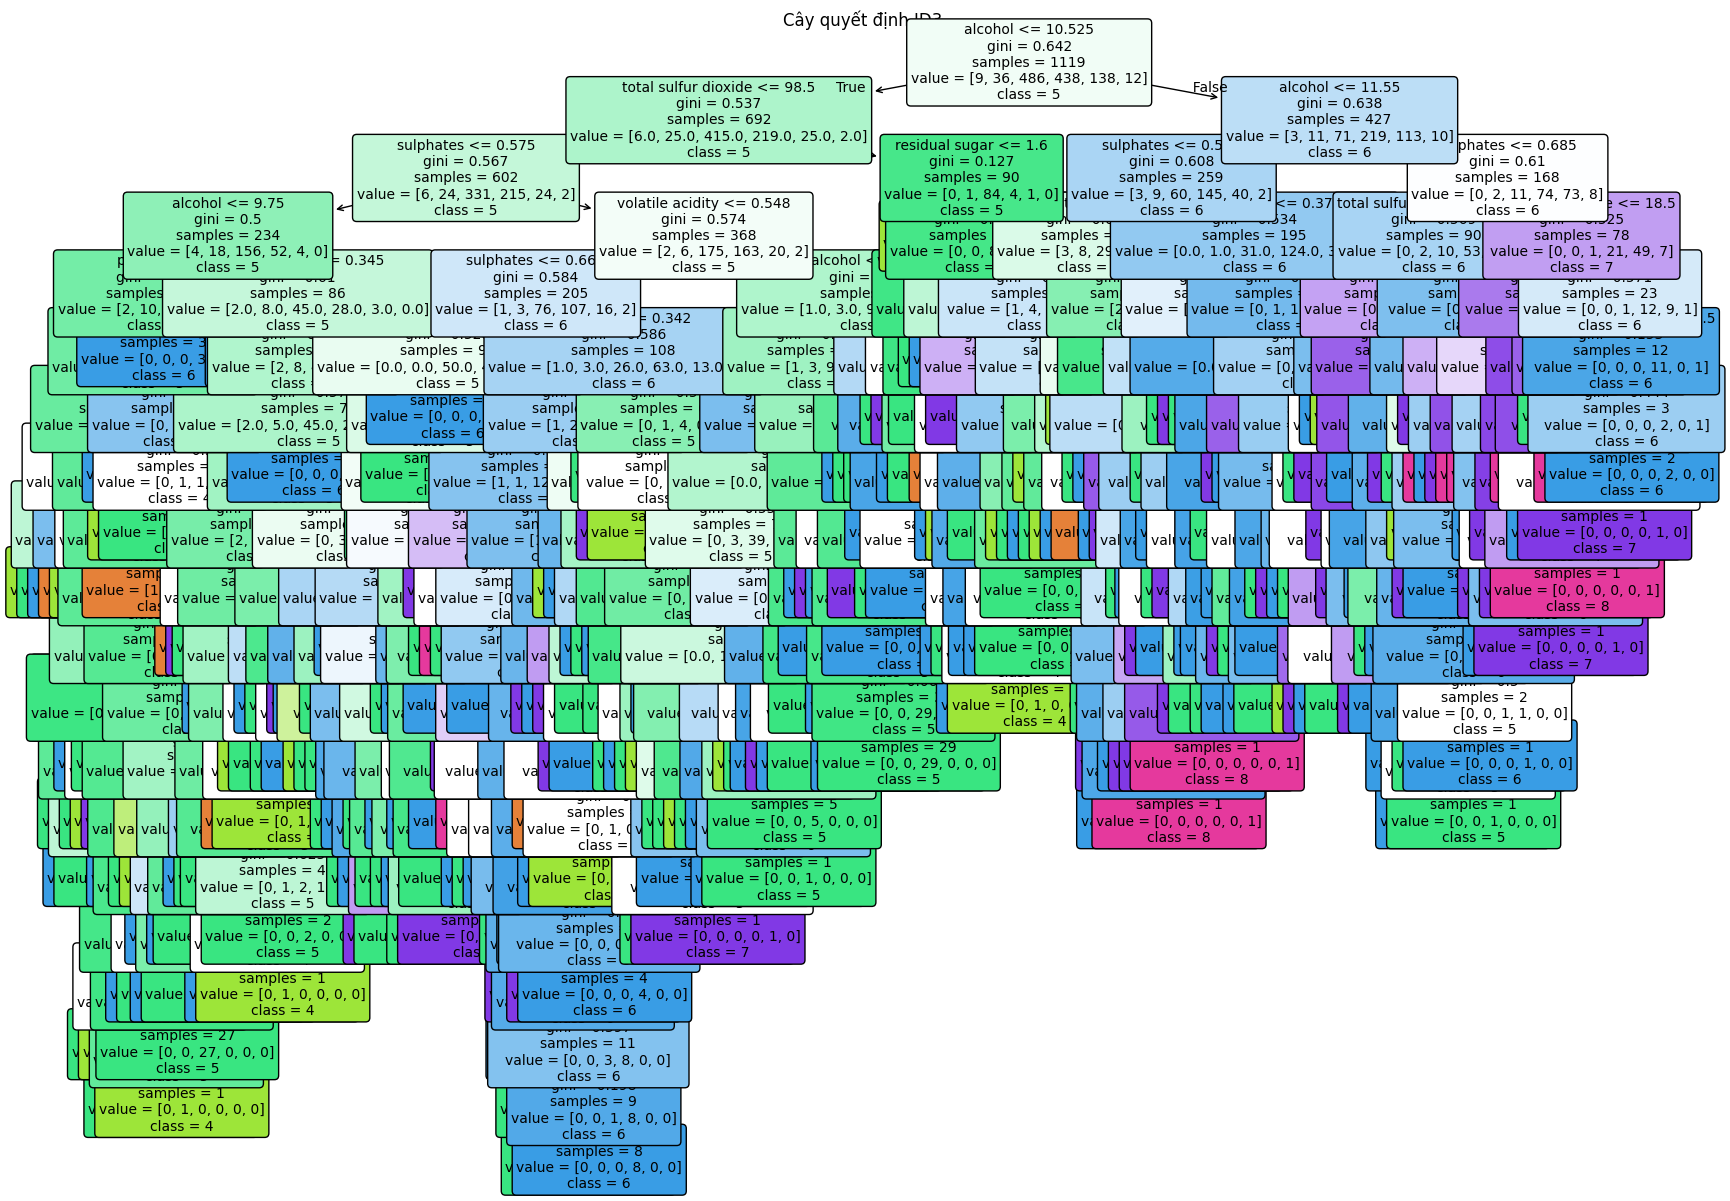

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 15))
plot_tree(dt_classifier,
          feature_names=X_train.columns.tolist(),
          class_names=[str(c) for c in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
print("\nHuỳnh Thị Trúc Lam - 6351071040")
plt.title("Cây quyết định ID3")
plt.show()


Huỳnh Thị Trúc Lam - 6351071040


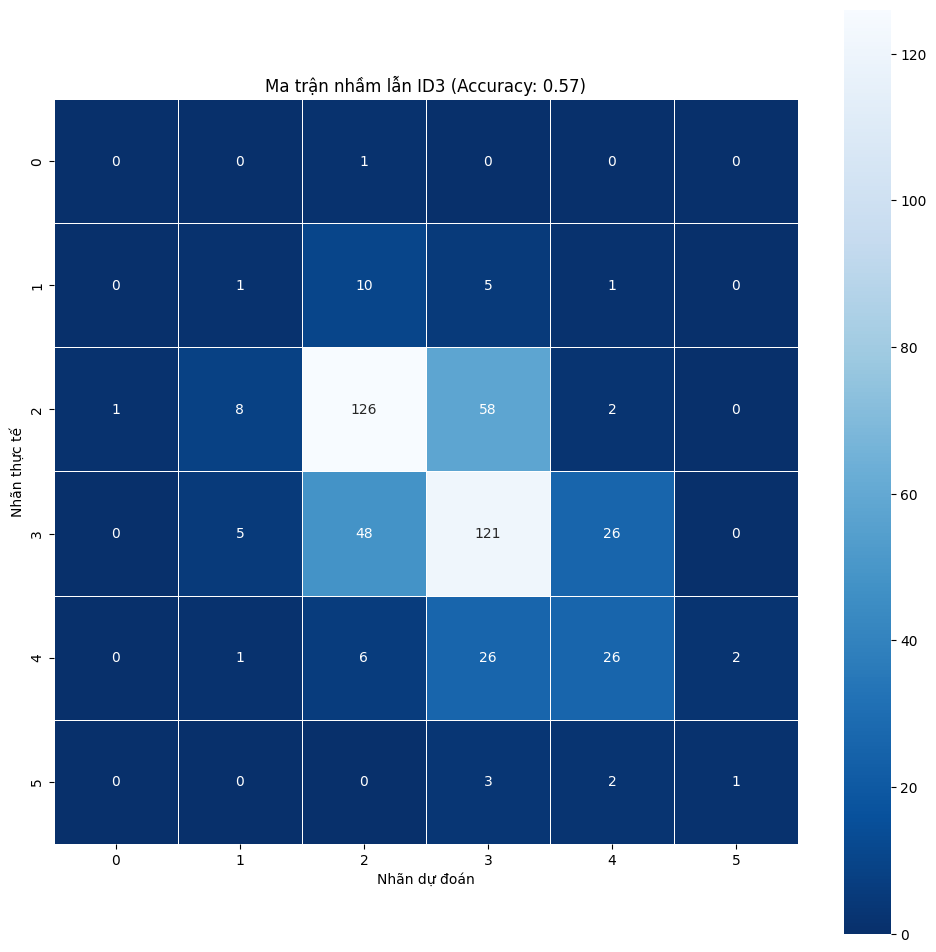

In [ ]:
from sklearn.metrics import accuracy_score

cm_id3 = confusion_matrix(y_test, y_pred) # Use y_test and y_pred from ID3 model

plt.figure(figsize=(12,12))
sns.heatmap(cm_id3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap="Blues_r" )
plt.title(f"Ma trận nhầm lẫn ID3 (Accuracy: {accuracy_score(y_test, y_pred):.2f})")
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
print("\nHuỳnh Thị Trúc Lam - 6351071040")
plt.show()

**Yêu cầu 8:** Lặp lại yêu cầu 7 đối với cây CART.

Ma trận nhầm lẫn CART:
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  1   8 126  58   2   0]
 [  0   5  48 121  26   0]
 [  0   1   6  26  26   2]
 [  0   0   0   3   2   1]]

Báo cáo phân loại CART:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.59       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480


Huỳnh Thị Trúc Lam - 6351071040


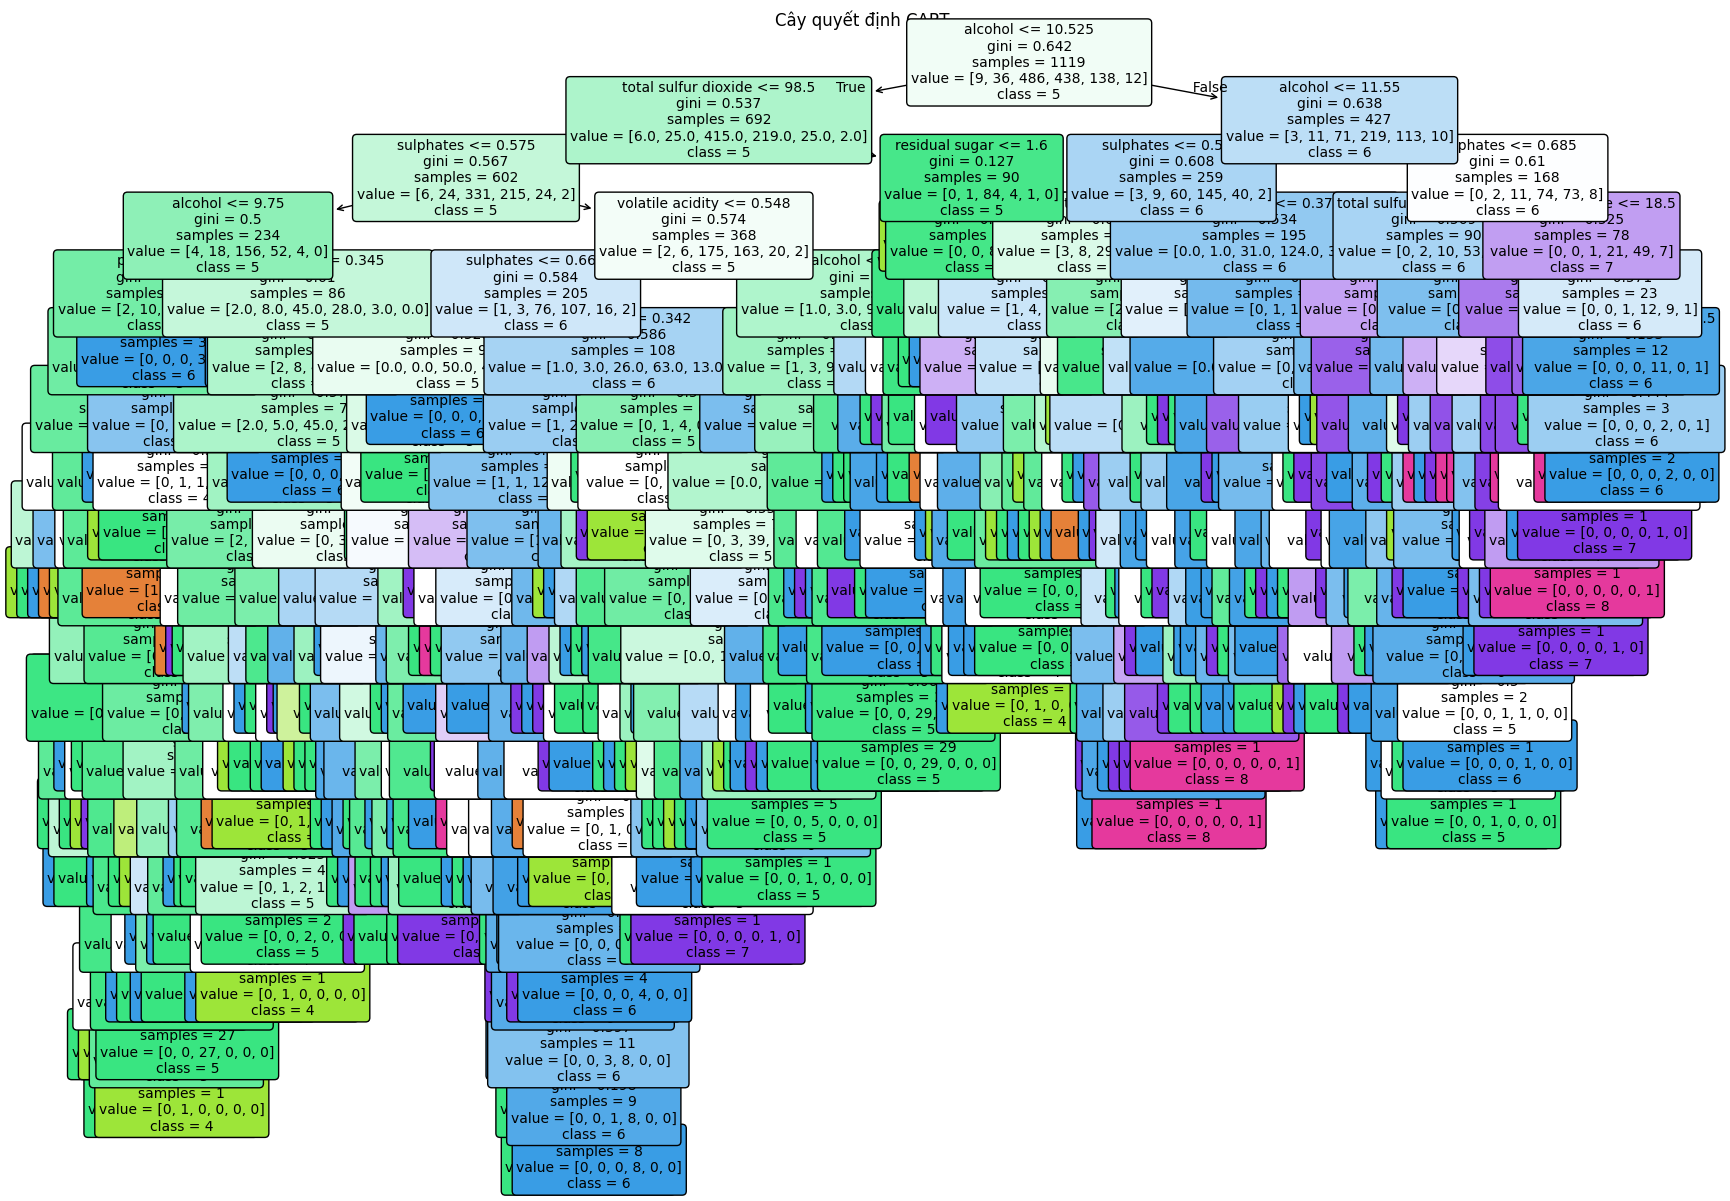

In [ ]:
cart_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_classifier.fit(X_train, y_train)

y_pred_cart = cart_classifier.predict(X_test)

print("Ma trận nhầm lẫn CART:")
print(confusion_matrix(y_test, y_pred_cart))

print("\nBáo cáo phân loại CART:")
print(classification_report(y_test, y_pred_cart))

plt.figure(figsize=(20, 15))
plot_tree(cart_classifier,
          feature_names=X_train.columns.tolist(),
          class_names=[str(c) for c in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)

print("\nHuỳnh Thị Trúc Lam - 6351071040")
plt.title("Cây quyết định CART")
plt.show()


Huỳnh Thị Trúc Lam - 6351071040


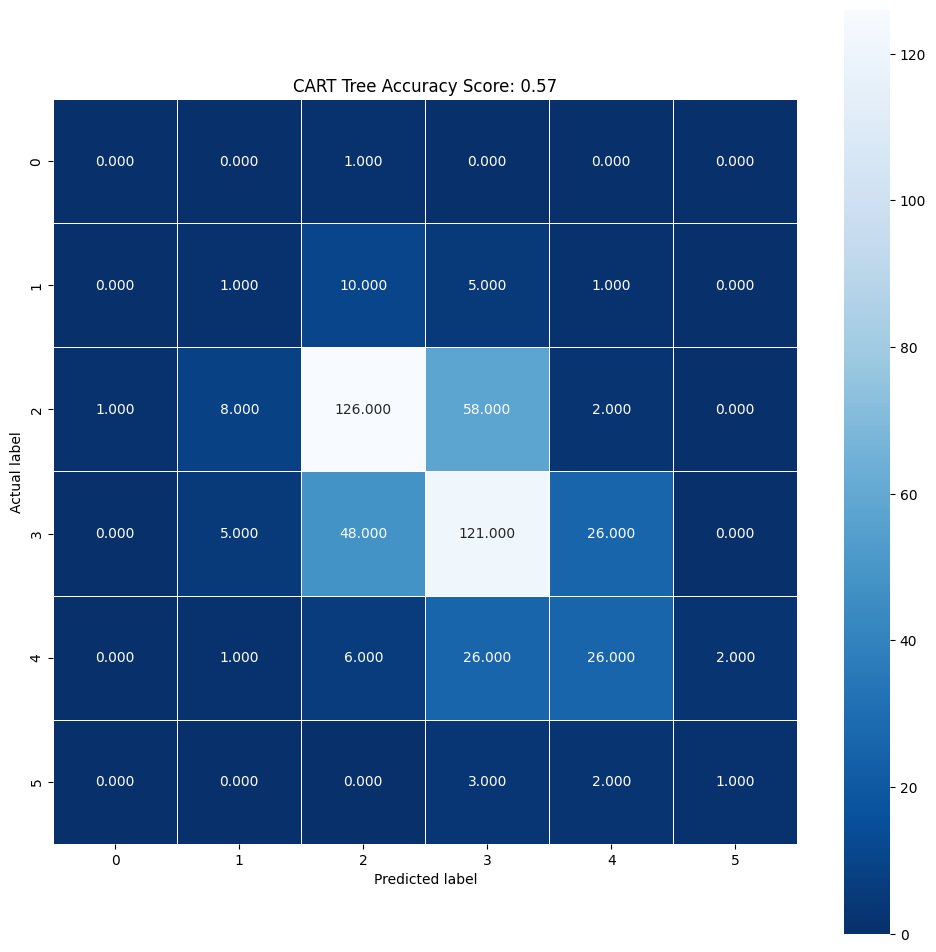

In [ ]:
from sklearn.metrics import accuracy_score

cm_cart = confusion_matrix(y_test, y_pred_cart) # Define cm_cart here

plt.figure(figsize=(12,12))
sns.heatmap(cm_cart, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"CART Tree Accuracy Score: {accuracy_score(y_test, y_pred_cart):.2f}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nHuỳnh Thị Trúc Lam - 6351071040")
plt.show()

**Yêu cầu 9:** Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được. Đối với thuật toán Naïve Bayes, sinh viên cũng làm tương tự với câu lệnh

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

print("Ma trận nhầm lẫn Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nBáo cáo phân loại Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("\nHuỳnh Thị Trúc Lam - 6351071040")


Ma trận nhầm lẫn Naive Bayes:
[[  0   0   1   0   0   0]
 [  1   2   8   6   0   0]
 [  0   6 121  63   5   0]
 [  0   9  46 107  35   3]
 [  0   0   3  28  30   0]
 [  0   0   0   1   5   0]]

Báo cáo phân loại Naive Bayes:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480


Huỳnh Thị Trúc Lam - 6351071040



Huỳnh Thị Trúc Lam - 6351071040


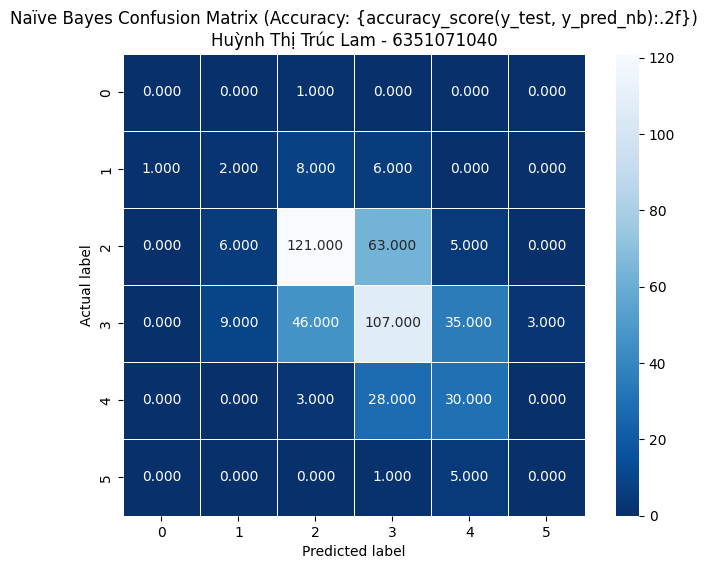

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_nb = confusion_matrix(y_test, y_pred_nb) # Define cm_nb here

import matplotlib.pyplot as plt
import seaborn as sns

print("\nHuỳnh Thị Trúc Lam - 6351071040")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.title("Naïve Bayes Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred_nb):.2f})\nHuỳnh Thị Trúc Lam - 6351071040")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Yêu cầu 10** Dựa vào các thông tin đã thu được, sinh viên tự đưa ra nhận xét, so sánh kết quả của các mô hình trên.

### So sánh và nhận xét các mô hình
Huỳnh Thị Trúc Lam - 6351071040

**1. Tổng quan hiệu suất (Overall Accuracy):**
*   **ID3:** 0.57
*   **CART:** 0.57
*   **Naïve Bayes:** 0.54

**Nhận xét:** Cả ba mô hình đều có độ chính xác tổng thể ở mức trung bình và tương đối gần nhau. ID3 và CART cho thấy hiệu suất tổng thể cao hơn một chút so với Naïve Bayes trên tập dữ liệu này.

**2. So sánh ID3 và CART:**
*   **Điểm tương đồng:** Trên bộ dữ liệu này, kết quả của ID3 (sử dụng tiêu chí entropy) và CART (sử dụng tiêu chí Gini) là *hoàn toàn giống nhau* về ma trận nhầm lẫn, báo cáo phân loại và độ chính xác. Điều này chỉ ra rằng đối với tập dữ liệu `winequality-red.csv` và các tham số mặc định được sử dụng (ngoại trừ `criterion`), hai thuật toán này đã xây dựng cấu trúc cây quyết định hoặc đạt được hiệu suất phân loại tương đương.
*   **Ưu điểm/Nhược điểm chung:** Cả hai đều có khả năng giải thích tốt (cây quyết định dễ hiểu), nhưng dễ bị quá khớp (overfitting), đặc biệt với các cây sâu. Cả hai đều gặp khó khăn tương tự trong việc phân loại các lớp thiểu số.

**3. So sánh với Naïve Bayes:**
*   **Độ chính xác tổng thể:** Naïve Bayes có độ chính xác tổng thể thấp hơn một chút (0.54) so với ID3 và CART (0.57).
*   **Hiệu suất trên các lớp:**
    *   **Lớp đa số (Quality 5, 6):** Naïve Bayes có precision cho lớp 5 là 0.68, cao hơn một chút so với 0.66 của ID3/CART. Tuy nhiên, recall cho lớp 5 của Naïve Bayes là 0.62, thấp hơn 0.65 của ID3/CART. Đối với lớp 6, Naïve Bayes có precision 0.52 và recall 0.54, thấp hơn ID3/CART (precision 0.57, recall 0.60).
    *   **Lớp thiểu số (Quality 3, 4, 8):** Tất cả ba mô hình đều hoạt động rất kém trên các lớp thiểu số này, với precision, recall, f1-score thường bằng 0 hoặc rất thấp. Tuy nhiên, Naïve Bayes dường như gặp khó khăn hơn một chút, với cả lớp 3 và 8 đều có recall 0.00, trong khi ID3/CART có recall 0.17 cho lớp 8.
*   **Ưu điểm của Naïve Bayes:** Đơn giản, nhanh chóng, và hiệu quả với dữ liệu phân tách rõ ràng hoặc khi giả định độc lập đúng. Ít bị quá khớp hơn cây quyết định.
*   **Nhược điểm của Naïve Bayes:** Giả định mạnh mẽ về tính độc lập giữa các đặc trưng có thể không đúng trong thực tế, dẫn đến hiệu suất thấp hơn. Nó cũng nhạy cảm với dữ liệu mất cân bằng lớp.

**4. Kết luận: Mô hình nào hoạt động tốt nhất?**

Trong ba mô hình đã so sánh, **ID3 và CART hoạt động tốt nhất**, mặc dù chỉ nhỉnh hơn Naïve Bayes một chút về độ chính xác tổng thể (0.57 so với 0.54) và có hiệu suất tốt hơn trên một số lớp đa số. Sự tương đồng hoàn toàn giữa ID3 và CART trên bộ dữ liệu này cho thấy rằng việc lựa chọn giữa entropy và Gini impurity không tạo ra sự khác biệt đáng kể về hiệu suất cuối cùng trong trường hợp này.

Tuy nhiên, cần lưu ý rằng hiệu suất tổng thể của cả ba mô hình vẫn chưa cao, đặc biệt là đối với các lớp thiểu số. Để cải thiện hiệu suất, đặc biệt là với các lớp có ít mẫu, có thể cần áp dụng các kỹ thuật như:
*   **Xử lý mất cân bằng lớp:** Oversampling (ví dụ: SMOTE) hoặc undersampling các lớp đa số.
*   **Tinh chỉnh siêu tham số (Hyperparameter Tuning):** Sử dụng GridSearchCV hoặc RandomizedSearchCV để tìm các tham số tối ưu cho cây quyết định (ví dụ: `max_depth`, `min_samples_leaf`).
*   **Sử dụng các mô hình phức tạp hơn:** Như Random Forest, Gradient Boosting, hoặc Support Vector Machines, có thể xử lý tốt hơn các mối quan hệ phức tạp trong dữ liệu.
